In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)

In [2]:
df_train_features=pd.read_csv("/Users/rachitlour/repos/H1N1_Flu_Prediction/training_set_features (1).csv",index_col="respondent_id")
df_train_labels=pd.read_csv("/Users/rachitlour/repos/H1N1_Flu_Prediction/training_set_labels (1).csv",index_col="respondent_id")

In [3]:
df_train_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
df_train_labels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
df_train_features.shape

(26707, 35)

In [6]:
df_train_labels.shape

(26707, 2)

In [7]:
np.testing.assert_array_equal(df_train_features.index.values, df_train_labels.index.values)

In [8]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [9]:
df_train_features.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [10]:
for column in df_train_features: 
    no_of_null=df_train_features[column].isnull().sum()
    print(f"{column}:Null values {no_of_null}")

h1n1_concern:Null values 92
h1n1_knowledge:Null values 116
behavioral_antiviral_meds:Null values 71
behavioral_avoidance:Null values 208
behavioral_face_mask:Null values 19
behavioral_wash_hands:Null values 42
behavioral_large_gatherings:Null values 87
behavioral_outside_home:Null values 82
behavioral_touch_face:Null values 128
doctor_recc_h1n1:Null values 2160
doctor_recc_seasonal:Null values 2160
chronic_med_condition:Null values 971
child_under_6_months:Null values 820
health_worker:Null values 804
health_insurance:Null values 12274
opinion_h1n1_vacc_effective:Null values 391
opinion_h1n1_risk:Null values 388
opinion_h1n1_sick_from_vacc:Null values 395
opinion_seas_vacc_effective:Null values 462
opinion_seas_risk:Null values 514
opinion_seas_sick_from_vacc:Null values 537
age_group:Null values 0
education:Null values 1407
race:Null values 0
sex:Null values 0
income_poverty:Null values 4423
marital_status:Null values 1408
rent_or_own:Null values 2042
employment_status:Null values 146

In [11]:
for column in df_train_features: 
    null_percentage=df_train_features[column].isnull().sum()/len(df_train_features)*100
    print(f"{column}:percentage__null= {null_percentage}")

h1n1_concern:percentage__null= 0.3444789755494814
h1n1_knowledge:percentage__null= 0.43434305612760693
behavioral_antiviral_meds:percentage__null= 0.2658479050436215
behavioral_avoidance:percentage__null= 0.7788220316770884
behavioral_face_mask:percentage__null= 0.07114239712434943
behavioral_wash_hands:percentage__null= 0.15726214101171979
behavioral_large_gatherings:percentage__null= 0.32575729209570525
behavioral_outside_home:percentage__null= 0.3070356086419291
behavioral_touch_face:percentage__null= 0.4792750964166698
doctor_recc_h1n1:percentage__null= 8.087767252031302
doctor_recc_seasonal:percentage__null= 8.087767252031302
chronic_med_condition:percentage__null= 3.635750926723331
child_under_6_months:percentage__null= 3.070356086419291
health_worker:percentage__null= 3.010446699367207
health_insurance:percentage__null= 45.95798854232972
opinion_h1n1_vacc_effective:percentage__null= 1.464035646085296
opinion_h1n1_risk:percentage__null= 1.4528026360130304
opinion_h1n1_sick_from_v

# EXPLORING THE DATASET

In [13]:
df_train_labels['h1n1_vaccine'].value_counts(normalize=True)*100

h1n1_vaccine
0    78.754634
1    21.245366
Name: proportion, dtype: float64

In [14]:
df_train_labels['seasonal_vaccine'].value_counts(normalize= True)*100

seasonal_vaccine
0    53.439173
1    46.560827
Name: proportion, dtype: float64

/var/folders/t7/lk70_yd96wj7wqmlj5lm49s40000gn/T/ipykernel_6415/2534646361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='h1n1_vaccine', data=df_train_labels, palette='viridis')
/var/folders/t7/lk70_yd96wj7wqmlj5lm49s40000gn/T/ipykernel_6415/2534646361.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='seasonal_vaccine', data=df_train_labels, palette='viridis')


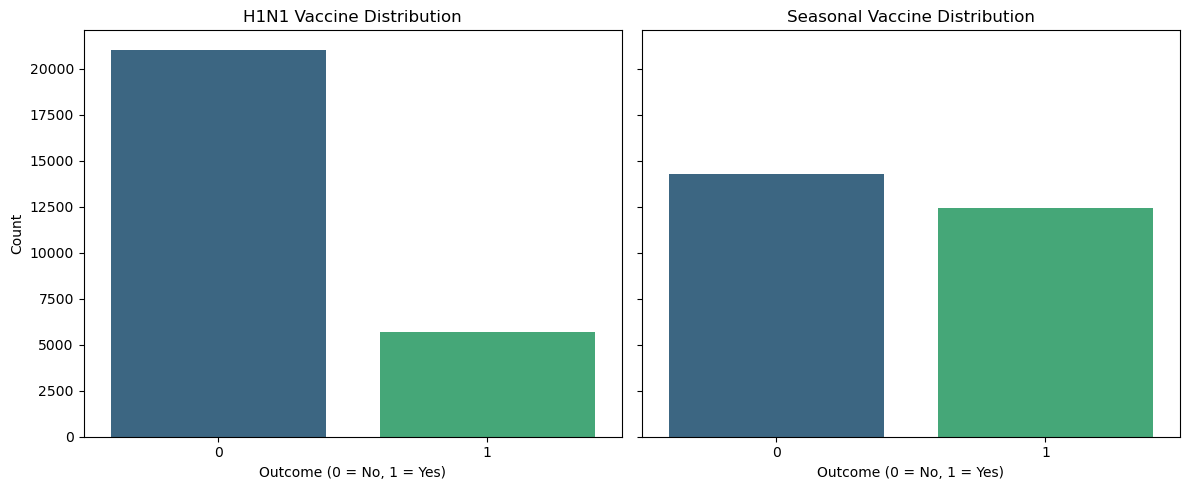

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for H1N1 Vaccine
sns.countplot(ax=axes[0], x='h1n1_vaccine', data=df_train_labels, palette='viridis')
axes[0].set_title('H1N1 Vaccine Distribution')
axes[0].set_xlabel('Outcome (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

# Plot for Seasonal Vaccine
sns.countplot(ax=axes[1], x='seasonal_vaccine', data=df_train_labels, palette='viridis')
axes[1].set_title('Seasonal Vaccine Distribution')
axes[1].set_xlabel('Outcome (0 = No, 1 = Yes)')
axes[1].set_ylabel('')  # No label since it's shared

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
pd.crosstab(
    df_train_labels["h1n1_vaccine"], 
    df_train_labels["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [18]:
# Phi Coefficient is the same as Pearson for two binary variables
(df_train_labels["h1n1_vaccine"]
     .corr(df_train_labels["seasonal_vaccine"], method="pearson"))

0.37714265306144684

## Features

In [23]:
# Join features and labels 
joined_df=df_train_features.join(df_train_labels)
joined_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


right final visualization is hard. We can instead pick one feature and one target and work our way up to a prototype, before applying it to more features and both targets. We'll use h1n1_concern, the level of concern the person showed about the H1N1 flu, and h1n1_vaccine as a target variable.

First, we'll get the count of observations for each combination of those two variables.

In [35]:
counts=(joined_df[["h1n1_concern","h1n1_vaccine"]].groupby(["h1n1_concern","h1n1_vaccine"]).size().unstack("h1n1_vaccine"))
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341
